In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
nba_seasondata = "Data/Seasons_Stats.csv"
nba_player = "Data/player_data.csv"

nba_data1 = pd.read_csv(nba_seasondata)
nba_data2 = pd.read_csv(nba_player)

In [3]:
nba_data2.head()
nba_data2 = nba_data2.rename(columns = {"name":"Player"})

In [4]:
nba_dataset = pd.merge(nba_data1, nba_data2, how='left',on='Player')
nba_dataset.head()
nba_dataset.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'year_start', 'year_end',
       'position', 'height', 'weight', 'birth_date', 'college'],
      dtype='object')

In [5]:
nba_champion = nba_dataset[["Year", "Player", "Tm", "Age", "Pos", "college", "height"]]
nba_champion.head()

,Year,Player,Tm,Age,Pos,college,height
0,1950.0,Curly Armstrong,FTW,31.0,G-F,Indiana University,5-11
1,1950.0,Cliff Barker,INO,29.0,SG,University of Kentucky,6-2
2,1950.0,Leo Barnhorst,CHS,25.0,SF,University of Notre Dame,6-4
3,1950.0,Ed Bartels,TOT,24.0,F,North Carolina State University,6-5
4,1950.0,Ed Bartels,DNN,24.0,F,North Carolina State University,6-5


In [6]:
nba_1990champion = nba_champion.loc[nba_champion["Year"] == 1990.0]
nba_1990champion = nba_1990champion.loc[nba_1990champion["Tm"] == "DET"]

In [7]:
nba_1991champion = nba_champion.loc[nba_champion["Year"] == 1991.0]
nba_1991champion = nba_1991champion.loc[nba_1991champion["Tm"] == "CHI"]

In [8]:
combined1 = pd.merge(nba_1990champion, nba_1991champion, how='outer')

In [9]:
nba_1992champion = nba_champion.loc[nba_champion["Year"] == 1992.0]
nba_1992champion = nba_1992champion.loc[nba_1992champion["Tm"] == "CHI"]

In [10]:
combined2 = pd.merge(combined1, nba_1992champion, how='outer')

In [11]:
nba_1993champion = nba_champion.loc[nba_champion["Year"] == 1993.0]
nba_1993champion = nba_1993champion.loc[nba_1993champion["Tm"] == "CHI"]

In [12]:
combined3 = pd.merge(combined2, nba_1993champion, how='outer')

In [13]:
nba_1994champion = nba_champion.loc[nba_champion["Year"] == 1994.0]
nba_1994champion = nba_1994champion.loc[nba_1994champion["Tm"] == "HOU"]

In [14]:
combined4 = pd.merge(combined3, nba_1994champion, how='outer')

In [15]:
nba_1995champion = nba_champion.loc[nba_champion["Year"] == 1995.0]
nba_1995champion = nba_1995champion.loc[nba_1995champion["Tm"] == "HOU"]

In [16]:
combined5 = pd.merge(combined4, nba_1995champion, how='outer')

In [17]:
nba_1996champion = nba_champion.loc[nba_champion["Year"] == 1996.0]
nba_1996champion = nba_1996champion.loc[nba_1996champion["Tm"] == "CHI"]

In [18]:
combined6 = pd.merge(combined5, nba_1996champion, how='outer')

In [19]:
nba_1997champion = nba_champion.loc[nba_champion["Year"] == 1997.0]
nba_1997champion = nba_1997champion.loc[nba_1997champion["Tm"] == "CHI"]

In [20]:
combined7 = pd.merge(combined6, nba_1997champion, how='outer')

In [21]:
nba_1998champion = nba_champion.loc[nba_champion["Year"] == 1998.0]
nba_1998champion = nba_1998champion.loc[nba_1998champion["Tm"] == "CHI"]

In [22]:
combined8 = pd.merge(combined7, nba_1998champion, how='outer')

In [23]:
nba_1999champion = nba_champion.loc[nba_champion["Year"] == 1999.0]
nba_1999champion = nba_1999champion.loc[nba_1999champion["Tm"] == "SAS"]

In [24]:
combined9 = pd.merge(combined8, nba_1999champion, how='outer')

In [25]:
nba_2000champion = nba_champion.loc[nba_champion["Year"] == 2000.0]
nba_2000champion = nba_2000champion.loc[nba_2000champion["Tm"] == "LAL"]

In [26]:
combined10 = pd.merge(combined9, nba_2000champion, how='outer')

In [27]:
nba_2001champion = nba_champion.loc[nba_champion["Year"] == 2001.0]
nba_2001champion = nba_2001champion.loc[nba_2001champion["Tm"] == "LAL"]

In [28]:
combined11 = pd.merge(combined10, nba_2001champion, how='outer')

In [29]:
nba_2002champion = nba_champion.loc[nba_champion["Year"] == 2002.0]
nba_2002champion = nba_2002champion.loc[nba_2002champion["Tm"] == "LAL"]

In [30]:
combined12 = pd.merge(combined11, nba_2002champion, how='outer')

In [31]:
nba_2003champion = nba_champion.loc[nba_champion["Year"] == 2003.0]
nba_2003champion = nba_2003champion.loc[nba_2003champion["Tm"] == "SAS"]

In [32]:
combined13 = pd.merge(combined12, nba_2003champion, how='outer')

In [33]:
nba_2004champion = nba_champion.loc[nba_champion["Year"] == 2004.0]
nba_2004champion = nba_2004champion.loc[nba_2004champion["Tm"] == "DET"]

In [34]:
combined14 = pd.merge(combined13, nba_2004champion, how='outer')

In [35]:
nba_2005champion = nba_champion.loc[nba_champion["Year"] == 2005.0]
nba_2005champion = nba_2005champion.loc[nba_2005champion["Tm"] == "SAS"]

In [36]:
combined15 = pd.merge(combined14, nba_2005champion, how='outer')

In [37]:
nba_2006champion = nba_champion.loc[nba_champion["Year"] == 2006.0]
nba_2006champion = nba_2006champion.loc[nba_2006champion["Tm"] == "MIA"]

In [38]:
combined16 = pd.merge(combined15, nba_2006champion, how='outer')

In [39]:
nba_2007champion = nba_champion.loc[nba_champion["Year"] == 2007.0]
nba_2007champion = nba_2007champion.loc[nba_2007champion["Tm"] == "SAS"]

In [40]:
combined17 = pd.merge(combined16, nba_2007champion, how='outer')

In [41]:
nba_2008champion = nba_champion.loc[nba_champion["Year"] == 2008.0]
nba_2008champion = nba_2008champion.loc[nba_2008champion["Tm"] == "BOS"]

In [42]:
combined18 = pd.merge(combined17, nba_2008champion, how='outer')

In [43]:
nba_2009champion = nba_champion.loc[nba_champion["Year"] == 2009.0]
nba_2009champion = nba_2009champion.loc[nba_2009champion["Tm"] == "LAL"]

In [44]:
combined19 = pd.merge(combined18, nba_2009champion, how='outer')

In [45]:
nba_2010champion = nba_champion.loc[nba_champion["Year"] == 2010.0]
nba_2010champion = nba_2010champion.loc[nba_2010champion["Tm"] == "LAL"]

In [46]:
combined20 = pd.merge(combined19, nba_2010champion, how='outer')

In [47]:
nba_2011champion = nba_champion.loc[nba_champion["Year"] == 2011.0]
nba_2011champion = nba_2011champion.loc[nba_2011champion["Tm"] == "DAL"]

In [48]:
combined21 = pd.merge(combined20, nba_2011champion, how='outer')

In [49]:
nba_2012champion = nba_champion.loc[nba_champion["Year"] == 2012.0]
nba_2012champion = nba_2012champion.loc[nba_2012champion["Tm"] == "MIA"]

In [50]:
combined22 = pd.merge(combined21, nba_2012champion, how='outer')

In [51]:
nba_2013champion = nba_champion.loc[nba_champion["Year"] == 2013.0]
nba_2013champion = nba_2013champion.loc[nba_2013champion["Tm"] == "MIA"]

In [52]:
combined23 = pd.merge(combined22, nba_2013champion, how='outer')

In [53]:
nba_2014champion = nba_champion.loc[nba_champion["Year"] == 2014.0]
nba_2014champion = nba_2014champion.loc[nba_2014champion["Tm"] == "SAS"]

In [54]:
combined24 = pd.merge(combined23, nba_2014champion, how='outer')

In [55]:
nba_2015champion = nba_champion.loc[nba_champion["Year"] == 2015.0]
nba_2015champion = nba_2015champion.loc[nba_2015champion["Tm"] == "GSW"]

In [56]:
combined25 = pd.merge(combined24, nba_2015champion, how='outer')

In [57]:
nba_2016champion = nba_champion.loc[nba_champion["Year"] == 2016.0]
nba_2016champion = nba_2016champion.loc[nba_2016champion["Tm"] == "CLE"]

In [58]:
combined26 = pd.merge(combined25, nba_2016champion, how='outer')

In [59]:
nba_2017champion = nba_champion.loc[nba_champion["Year"] == 2017.0]
nba_2017champion = nba_2017champion.loc[nba_2017champion["Tm"] == "GSW"]

In [60]:
combined27 = pd.merge(combined26, nba_2017champion, how='outer')

In [61]:
nba_2018champion = nba_champion.loc[nba_champion["Year"] == 2018.0]
nba_2018champion = nba_2018champion.loc[nba_2018champion["Tm"] == "GSW"]

In [62]:
combined28 = pd.merge(combined27, nba_2018champion, how='outer')

In [63]:
combined28.head()

,Year,Player,Tm,Age,Pos,college,height
0,1990.0,Mark Aguirre,DET,30.0,SF,DePaul University,6-6
1,1990.0,William Bedford,DET,26.0,C,University of Memphis,7-0
2,1990.0,Joe Dumars*,DET,26.0,SG,NaN,NaN
3,1990.0,James Edwards,DET,34.0,C,University of Washington,7-0
4,1990.0,Dave Greenwood,DET,32.0,PF,"University of California, Los Angeles",6-9


In [64]:
combined28.dtypes

Year       float64
Player      object
Tm          object
Age        float64
Pos         object
college     object
height      object
dtype: object

In [65]:
Playercount = combined28.groupby("college")
college = Playercount.nunique()["Player"]
college.sort_values(ascending=False)

college
University of California, Los Angeles      11
University of Arizona                       9
University of Florida                       9
University of North Carolina                9
University of Kansas                        8
University of Kentucky                      7
University of Texas at Austin               6
University of Connecticut                   5
Duke University                             5
Michigan State University                   5
Georgia Institute of Technology             5
University of Arkansas                      4
University of California                    4
University of Michigan                      4
University of Nevada, Las Vegas             4
University of Alabama                       3
Gonzaga University                          3
Providence College                          3
Oregon State University                     3
University of Iowa                          3
Oklahoma State University                   3
North Carolina State Unive

In [66]:
cities = ["UCLA", "Arizona", "UF", "UNC", "Kansas", "Kentucky", "Texas", "UConn", "Duke", "MSU", "GT"]
college_count = [11.0, 9.0, 9.0, 9.0, 8.0, 7.0, 6.0, 5.0, 5.0, 5.0, 5.0]
x_axis = np.arange(len(college_count))

<IPython.core.display.Javascript object>


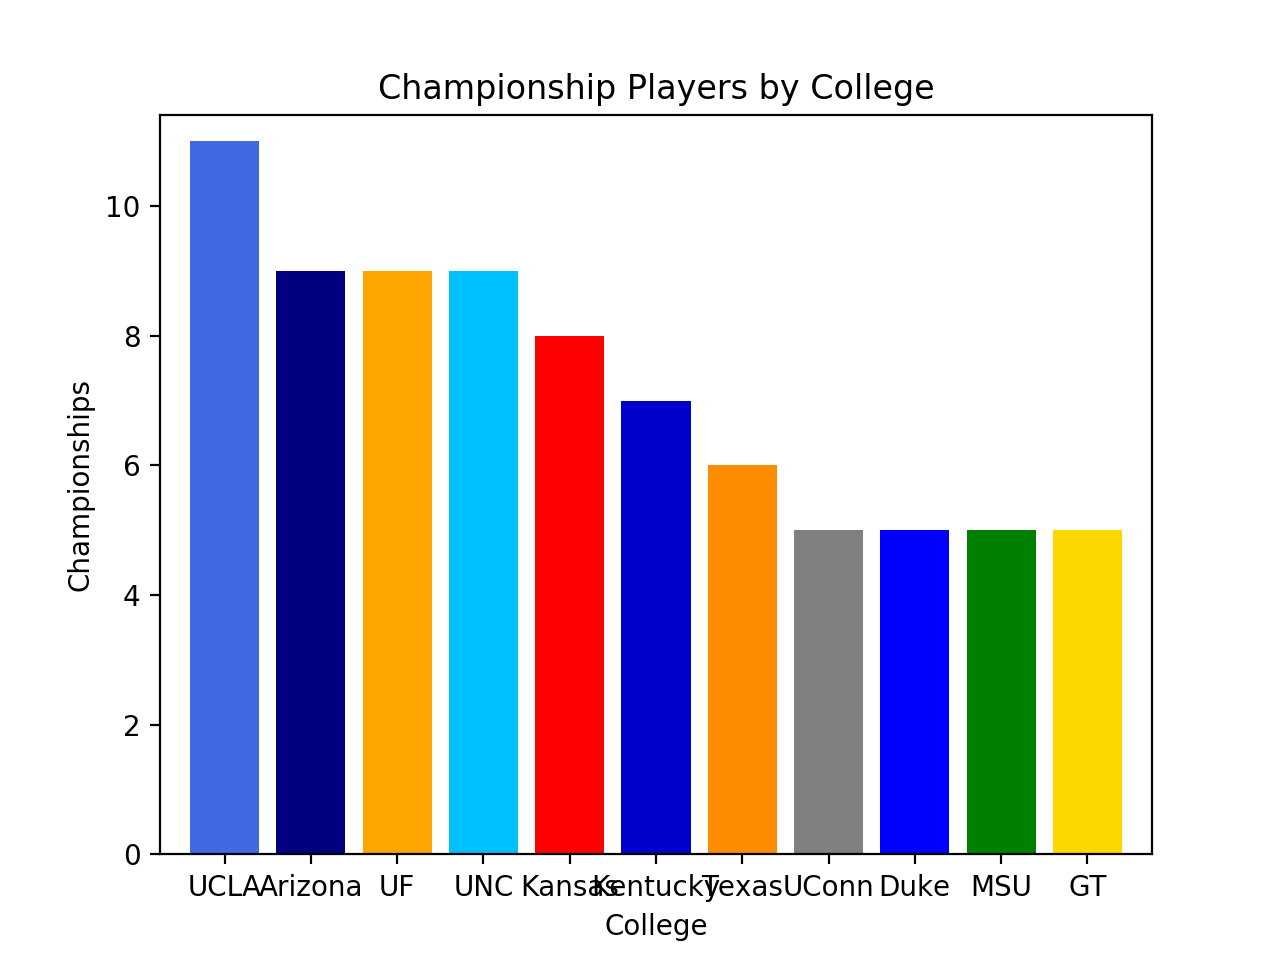

<BarContainer object of 11 artists>

In [67]:
plt.bar(x_axis, college_count, color=['royalblue', 'navy', 'orange', 'deepskyblue', 'red', 'mediumblue', 'darkorange',
                                      'grey', 'blue', 'green', 'gold'], align="center")

In [68]:
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, cities)

([<matplotlib.axis.XTick at 0x113ec4828>,
 <a list of 11 Text xticklabel objects>)

In [69]:
plt.xlim(-0.75, len(x_axis)-0.25)

(-0.75, 10.75)

In [70]:
plt.ylim(0, max(college_count)+0.4)

(0, 11.4)

In [71]:
plt.title("Championship Players by College")
plt.xlabel("College")
plt.ylabel("Championships")

Text(0, 0.5, 'Championships')

In [72]:
plt.savefig("CollegeChampionships.png", bbox_inches="tight")

In [73]:
plt.show()

In [74]:
team_record = "Data/Team_Records37.csv"
team_stats = pd.read_csv(team_record)
team_stats.head()

,Season1,Season,Lg,Team,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Coaches,Top WS
0,2017,2018,NBA,Boston Celtics,29,10,0.744,1,4.38,95.4,-1.7,108.0,0.2,102.8,-5.0,NaN,B. Stevens (29-10),K. Irving (5.7)
1,2016,2017,NBA,Boston Celtics*,53,29,0.646,1,2.25,96.8,0.4,111.2,2.4,108.4,-0.4,Lost E. Conf. Finals,B. Stevens (53-29),I. Thomas (12.5)
2,2015,2016,NBA,Boston Celtics*,48,34,0.585,2,2.84,98.5,2.7,106.8,0.4,103.6,-2.8,Lost E. Conf. 1st Rnd.,B. Stevens (48-34),I. Thomas (9.7)
3,2014,2015,NBA,Boston Celtics*,40,42,0.488,2,-0.40,95.8,1.9,104.7,-0.9,104.5,-1.1,Lost E. Conf. 1st Rnd.,B. Stevens (40-42),T. Zeller (6.5)
4,2013,2014,NBA,Boston Celtics,25,57,0.305,4,-4.97,93.3,-0.6,102.9,-3.8,107.7,1.0,NaN,B. Stevens (25-57),B. Bass (5.1)


In [75]:
team_stats = team_stats.drop(["Season1"], axis=1)

In [76]:
team_stats.head()

,Season,Lg,Team,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Coaches,Top WS
0,2018,NBA,Boston Celtics,29,10,0.744,1,4.38,95.4,-1.7,108.0,0.2,102.8,-5.0,NaN,B. Stevens (29-10),K. Irving (5.7)
1,2017,NBA,Boston Celtics*,53,29,0.646,1,2.25,96.8,0.4,111.2,2.4,108.4,-0.4,Lost E. Conf. Finals,B. Stevens (53-29),I. Thomas (12.5)
2,2016,NBA,Boston Celtics*,48,34,0.585,2,2.84,98.5,2.7,106.8,0.4,103.6,-2.8,Lost E. Conf. 1st Rnd.,B. Stevens (48-34),I. Thomas (9.7)
3,2015,NBA,Boston Celtics*,40,42,0.488,2,-0.40,95.8,1.9,104.7,-0.9,104.5,-1.1,Lost E. Conf. 1st Rnd.,B. Stevens (40-42),T. Zeller (6.5)
4,2014,NBA,Boston Celtics,25,57,0.305,4,-4.97,93.3,-0.6,102.9,-3.8,107.7,1.0,NaN,B. Stevens (25-57),B. Bass (5.1)


In [77]:
team_stats = team_stats.loc[team_stats["Season"] >= 1990]
team_stats

,Season,Lg,Team,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Coaches,Top WS
0,2018,NBA,Boston Celtics,29,10,0.744,1,4.38,95.4,-1.7,108.0,0.2,102.8,-5.0,NaN,B. Stevens (29-10),K. Irving (5.7)
1,2017,NBA,Boston Celtics*,53,29,0.646,1,2.25,96.8,0.4,111.2,2.4,108.4,-0.4,Lost E. Conf. Finals,B. Stevens (53-29),I. Thomas (12.5)
2,2016,NBA,Boston Celtics*,48,34,0.585,2,2.84,98.5,2.7,106.8,0.4,103.6,-2.8,Lost E. Conf. 1st Rnd.,B. Stevens (48-34),I. Thomas (9.7)
3,2015,NBA,Boston Celtics*,40,42,0.488,2,-0.40,95.8,1.9,104.7,-0.9,104.5,-1.1,Lost E. Conf. 1st Rnd.,B. Stevens (40-42),T. Zeller (6.5)
4,2014,NBA,Boston Celtics,25,57,0.305,4,-4.97,93.3,-0.6,102.9,-3.8,107.7,1.0,NaN,B. Stevens (25-57),B. Bass (5.1)
5,2013,NBA,Boston Celtics*,41,40,0.506,3,-0.62,91.7,-0.3,103.1,-2.8,103.3,-2.6,Lost E. Conf. 1st Rnd.,D. Rivers (41-40),P. Pierce (7.2)
6,2012,NBA,Boston Celtics*,39,27,0.591,1,2.26,90.4,-0.9,101.0,-3.6,98.2,-6.4,Lost E. Conf. Finals,D. Rivers (39-27),P. Pierce (7.0)
7,2011,NBA,Boston Celtics*,56,26,0.683,1,4.83,90.4,-1.7,106.2,-1.1,100.3,-7.0,Lost E. Conf. Semis,D. Rivers (56-26),P. Pierce (11.6)
8,2010,NBA,Boston Celtics*,50,32,0.610,1,3.37,91.6,-1.1,107.7,0.1,103.8,-3.8,Lost Finals,D. Rivers (50-32),R. Rondo (9.6)
9,2009,NBA,Boston Celtics*,62,20,0.756,1,7.44,90.4,-1.3,110.5,2.2,102.3,-6.0,Lost E. Conf. Semis,D. Rivers (62-20),R. Allen (11.1)


In [78]:
# Set the 'car name' as our index
team_stats = team_stats.set_index('Team')

# Convert the "horsepower" column to numeric so the data can be used
team_stats['ORtg'] = pd.to_numeric(team_stats['ORtg'])

<IPython.core.display.Javascript object>


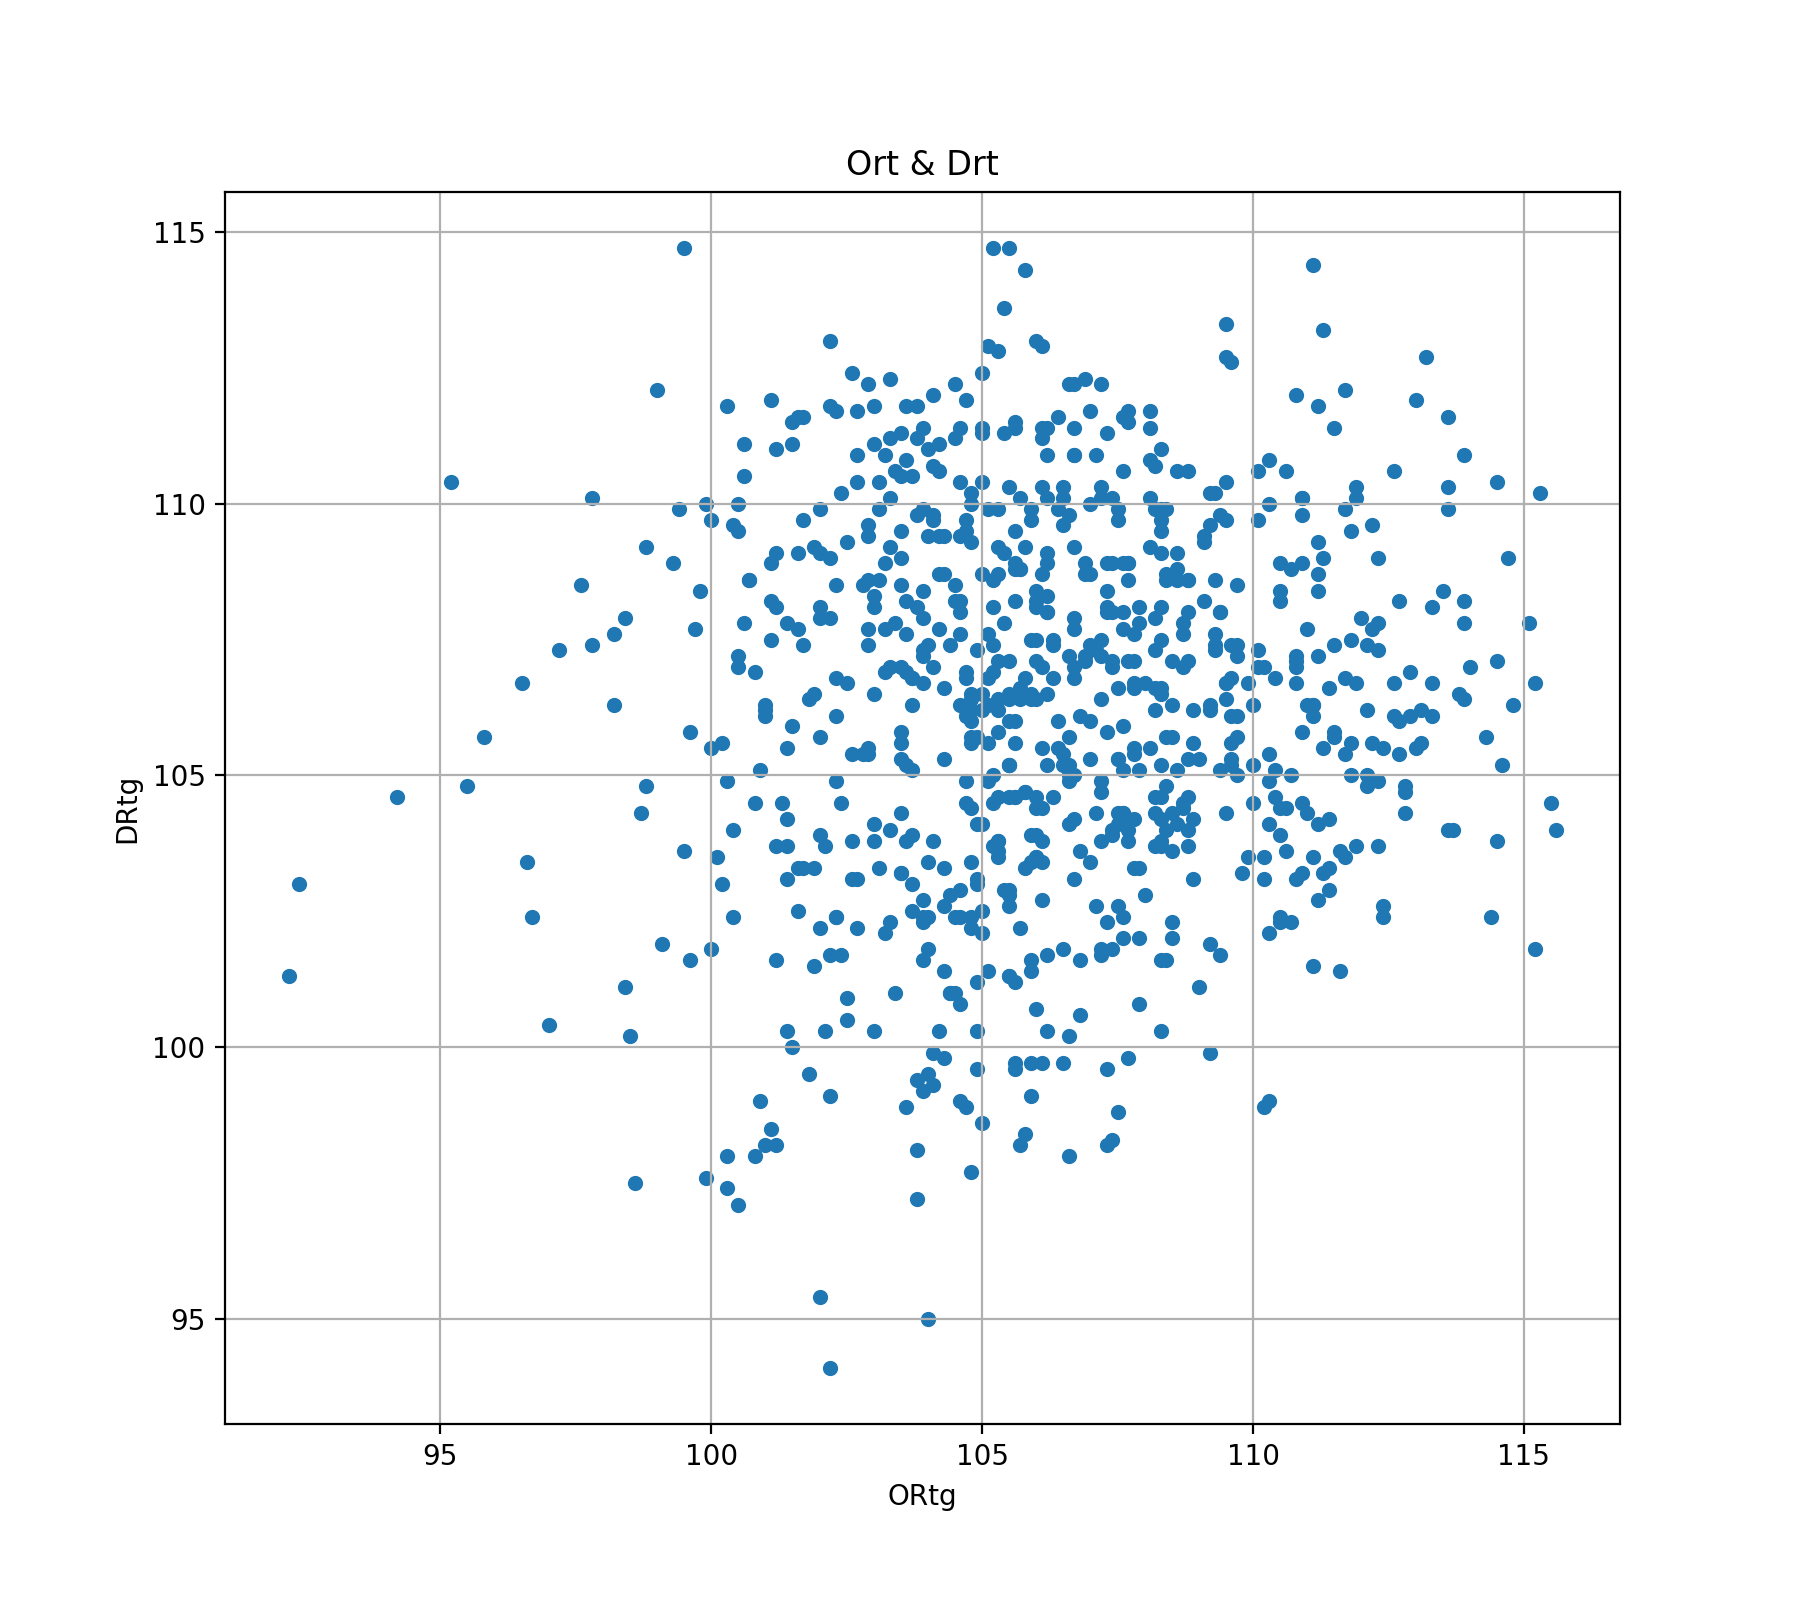

In [79]:
team_stats.plot(kind="scatter", x="ORtg", y="DRtg", grid=True, figsize=(9,8),
              title="Ort & Drt")
plt.show()

In [80]:
nba_csv = "Data/NBAKeyStats.csv"
nba_key = pd.read_csv(nba_csv)

In [81]:
nba_key.columns

Index(['Year', 'Rank', 'Status', 'Team', 'Age', 'W', 'L', 'PW', 'PL', 'MOV',
       'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%',
       'eFG%', 'TOV%', 'ORB%', 'FT/FGA', 'eFG%.1', 'TOV%.1', 'DRB%',
       'FT/FGA.1'],
      dtype='object')

In [82]:
nba_key = nba_key.rename(columns = {"TOV%.1":"TOV%", "eFG%.1":"eFG%", "FT/FGA.1":"FT/FGA"})

In [83]:
nba_key.head()

,Year,Rank,Status,Team,Age,W,L,PW,PL,MOV,...,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,eFG%,TOV%,DRB%,FT/FGA
0,1990,1.0,PQ,Phoenix Suns*,26.7,54.0,28.0,58.0,24,7.10,...,0.076,0.565,0.509,13.3,31.1,0.302,0.478,12.8,68.8,0.209
1,1990,2.0,PQ,Los Angeles Lakers*,28.9,63.0,19.0,58.0,24,6.78,...,0.120,0.562,0.512,13.2,32.8,0.271,0.479,12.8,68.5,0.219
2,1990,3.0,CC,Portland Trail Blazers*,26.7,59.0,23.0,57.0,25,6.32,...,0.075,0.535,0.486,13.4,36.5,0.269,0.479,15.2,70.8,0.265
3,1990,4.0,NBAC,Detroit Pistons*,29.5,59.0,23.0,57.0,25,6.09,...,0.078,0.537,0.490,13.4,34.2,0.245,0.461,13.7,70.3,0.262
4,1990,5.0,PQ,Utah Jazz*,27.6,55.0,27.0,54.0,28,4.79,...,0.096,0.570,0.522,15.5,30.1,0.284,0.468,13.4,69.5,0.268


In [85]:
nba_keydoe = nba_key.groupby(["Status"])
nba_keydoe.mean()

,Year,Rank,Age,W,L,PW,PL,MOV,SOS,SRS,...,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,eFG%,TOV%,DRB%,FT/FGA
Status,,,,,,,,,,,,,,,,,,,,,
CC,2004.000000,4.862069,28.265517,55.517241,24.827586,54.931034,25.413793,5.614828,-0.309310,5.305172,...,0.213897,0.553207,0.509276,13.903448,28.289655,0.248690,0.478103,13.931034,72.637931,0.221379
NBAC,2004.000000,3.034483,28.796552,59.344828,21.000000,58.689655,21.655172,7.211034,-0.234483,6.976897,...,0.210207,0.551828,0.512345,13.434483,28.803448,0.225000,0.471690,14.017241,72.603448,0.214069
NP,2004.641161,22.527704,26.127968,28.865435,51.445910,29.539683,50.781003,-4.041609,0.181372,-3.860923,...,0.192665,0.523319,0.480454,14.072559,28.093931,0.223142,0.500818,13.654354,71.185752,0.235536
PQ,2004.000000,9.669951,27.620936,48.243842,32.096059,47.923645,32.416256,2.856946,-0.130936,2.726552,...,0.203298,0.541249,0.497906,13.599261,28.291872,0.234411,0.483704,13.944335,72.168473,0.225778
